# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*

## Введение в Pandas 

Pandas - библиотека для работы с табличными данными в питоне.
* Документация: https://pandas.pydata.org/
* 10 minutes intro: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* Pandas Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
#pip install pandasql

import sys
!{sys.executable} -m pip install pandasql

import pandasql as ps

In [ ]:
import pandas

Чтобы не писать название библиотеки целиком каждый раз, когда понадобится ее использовать, принято сокращать название библиотеки и импортировать ее как "pd":

In [2]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 

В Pandas есть тип данных датафрейм (DataFrame), в котором удобно хранить таблицы с данными. Создадим небольшой датафрейм своими руками:

In [3]:
df = pd.DataFrame() # создали пустой датафрейм с помощью метода DataFrame() библиотеки pandas (pd)
df['a'] = [10,20,30] # создаем колонку "а" и помещаем в нее столбец с данными - [10, 20, 30]
df

,a
0,10
1,20
2,30


В датафрейме автоматически создалась нумерация строк - по умолчанию она с 0.

In [6]:
df['b'] = ['one', 'two', 'three']
df

,a,b
0,10,one
1,20,two
2,30,three


Конечно, чаще всего приходится работать с уже готовыми наборами данных. Такие данные обычно хранятся в формтае xls(x) - для работы в Excel, или (чаще) в формате csv - comma-separated value. Попробуем импортировать csv файл с данными о пассажирах Титаника: они лежат в файле 'titanic.csv' (попродуйте открыть его в текстовом редакторе и посмотрите, как он устроен внутри).

In [9]:
data = pd.read_csv('titanic.csv')

Функция read_cvs читает данные из файла формата csv данные и преобразует в pandas.DataFrame. Аналогичная функция read_excel может читать данные в офрмате xls(x).

Посмотрим на наши данные:

In [10]:
data.head(10) # функция head() показывает первые строки датафрейма, по умолчанию 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
simple_query = '''
     SELECT 
         PassengerId, 
         Age,
         Survived,
         Name
     FROM data 
     ORDER BY Age asc
     LIMIT 5
     '''
tst = ps.sqldf(simple_query, locals())
tst

,PassengerId,Age,Survived,Name
0,6,None,0,"Moran, Mr. James"
1,18,None,1,"Williams, Mr. Charles Eugene"
2,20,None,1,"Masselmani, Mrs. Fatima"
3,27,None,0,"Emir, Mr. Farred Chehab"
4,29,None,1,"O'Dwyer, Miss. Ellen ""Nellie"""


In [ ]:
data.head(10) # можно передать аргументом количество строк, которые хотите увидеть

In [15]:
data.tail(10) # можно посмотреть последние записи

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


По столбцам идут признаки, по строкам - объекты (пассажиры).

In [16]:
data.shape # функция shape показывает размерность датафрейма (строк, столбцов)

(891, 12)

In [17]:
data.columns # список столбцов 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Описание признаков:

**PassengerId** - id пассажира

**Survived** бинарная переменная: выжил пассажирил (1) или нет (0)

**Pclass** - класс пассажира

**Name** - имя пассажира

**Sex** - пол пассажира

**Age** - возраст пассажира

**SibSp** - количество родственников (братьев, сестер, супругов) пассажира на борту

**Parch** - количество родственников (родителей / детей) пассажира на борту

**Ticket** - номер билета

**Fare** - тариф (стоимость билета)

**Cabin** - номер кабины

**Embarked** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown)

Так можно обратиться к столбцу:

In [20]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
data.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Или к нескольким столбцам сразу:

In [22]:
data[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


A так - к строке по индексу:

In [ ]:
data.head(3)

In [24]:
data.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [26]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [28]:
data.iloc[0:3] # строки с 1 по 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
data[data['PassengerId'] == 2][['Survived','Pclass','Name']]

,Survived,Pclass,Name
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


In [37]:
data.loc[1:3, 'Survived':'Sex'] # строки с 1 по 3, колонки от Survived до Sex

,Survived,Pclass,Name,Sex
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,1,3,"Heikkinen, Miss. Laina",female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


__loc__ возвращает данные на основе индекса, а __iloc__ -  основываясь исключительно на позиции индекса, начиная с 0.

Пример:

In [39]:
df = pd.DataFrame()
df['Name'] =  ['Tom', 'Jack', 'Nick', 'Juli']
df['Mark'] = [99, 98, 95, 90]
print(df)
df.index = ['id1','id2','id3','id4']
df

   Name  Mark
0   Tom    99
1  Jack    98
2  Nick    95
3  Juli    90


,Name,Mark
id1,Tom,99
id2,Jack,98
id3,Nick,95
id4,Juli,90


In [41]:
df.loc['id1']

Name    Tom
Mark     99
Name: id1, dtype: object

In [42]:
df.iloc[1]

Name    Jack
Mark      98
Name: id2, dtype: object

In [43]:
df.loc['id2':'id3']

,Name,Mark
id2,Jack,98
id3,Nick,95


In [44]:
df.iloc[1:2]

,Name,Mark
id2,Jack,98


Кроме того, можно выбирать объекты, удовлетворяющие каким-то свойствам, например, все пассажиры-женщины:

In [45]:
data[data.Sex == 'female'].shape

(314, 12)

Пассажиры первого класса:

In [46]:
data[data.Pclass == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [47]:
# data[data.Sex in 'female']
query = """
select *
from data 
where Sex = 'female'
"""

tst = ps.sqldf(query, locals())
tst.shape

(314, 12)

Пассажиры первого или второго классов:

In [48]:
data[data.Pclass.isin([1,2])].shape

(400, 12)

In [49]:
query = """
select *
from data 
where Pclass in (1,2)
"""

tst = ps.sqldf(query, locals())
tst.shape

(400, 12)

Пассажиры младше 18:

In [50]:
data[data.Age < 18].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Девушки в возрасте от 18 до 25, путешествующие в одиночку (без каких-либо родственников):

In [53]:
data[(data.Sex == 'female') & (data.Age > 18) & (data.Age < 25) & (data.SibSp == 0) &(data.Parch == 0)].shape

(25, 12)

Сколько таких путешественниц?

Задание: 

1) Посчитайте количество пассажиров первого класса, которые сели на борт в Саутгемптоне.

2) Сколько пассажиров третьего класса, которые путешествовали в компании 2 или более родственников (братьев / сестер / супругов)?

3) Сколько в среднем стоил билет первого класса?

In [57]:
data[(data.Pclass == 1) & (data.Embarked == 'S')].shape

(127, 12)

In [58]:
data[(data.Pclass == 3) & (data.SibSp >= 2)].shape

(57, 12)

In [ ]:
data[(data.Embarked == 'S') & (data.Pclass==1)].shape

In [67]:
data[(data.Pclass == 3) & (data.SibSp + data.Parch >=2)].shape[0]

110

Иногда нужно создать новый признак из уже существующих, например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы SibSp и Parch и поместим сумму в новый столбец FamilySize. Такая процедура называет broadcasting. 

In [69]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


А теперь давайте создадим переменную, которая бы нам показывала, что пассажир ехал в одиночку. Такой пассажир путешествовал без родственников. Мы напишем условие с помощью анонимной функции (1, если FamilySize равно 0 и 0 во всех остальных случаях) и применим ее к столбцу FamilySize с помощью метода .apply().

In [72]:
def is_alone(family_size):
    return family_size == 1

data['Alone'] = data['FamilySize'].apply(is_alone)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


In [ ]:
data

In [76]:
def is_alone(values):
    if values[0]+values[1] == 1:
        return 1
    else:
        return 0


In [77]:
data['is_Alone'] = data[['SibSp','Parch']].apply(lambda x: if x[0]+x[1] == 0 else 0)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,True,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,True,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,False,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,False,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,False,NaN


Функция, которую применяем к столбцу, может быть и посложнее. Давайте из каждого имени пассажира достанем его титул. Сначала потренируемся на одном пассажире.

In [78]:
data.loc[0]['Name']

'Braund, Mr. Owen Harris'

Ок, выбрали имя. Это строка. Давайте подумаем, как достать из нее титул. Вроде бы титул всегда после фамилии. Разобьем строку по пробелу и доставим второй (первый по индексу) элемент.

In [79]:
data.loc[0]['Name'].split(',')[1].split('.')[0].strip()

'Mr'

Ура! Теперь напишем функцию, которая будет забирать титул из имени, а потом применим ее к колонке Name.

In [80]:
def return_title(full_name):
    return(full_name.split(',')[1].split('.')[0].strip())

Теперь сформируем новый столбец family_name из столбца Name с помощью написанной нами функции:

In [81]:
data['Title'] = data.Name.apply(return_title)
data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,NaN,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,NaN,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,NaN,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,True,NaN,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,True,NaN,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,False,NaN,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,False,NaN,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,False,NaN,Mrs


Кстати, удалить колонку можно так. В нашем анализе мы не будем использовать колонку Ticket, даайте удалим ее.

In [82]:
del data['is_Alone']

In [84]:
del data['Alone']

In [85]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Mrs


In [86]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [87]:
query = """
select distinct Title
from data 
"""

tst = ps.sqldf(query, locals())
tst

,Title
0,Mr
1,Mrs
2,Miss
3,Master
4,Don
5,Rev
6,Dr
7,Mme
8,Ms
9,Major


Полезно посмотреть, какие значения содержатся в столбце. Для категориальных данных можно посчитать частоту встречаемости каждого значения с помошью функции value_counts:

In [88]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
query = """
select Title, count(*) as cnt
from data 
group by Title
order by cnt desc
"""

tst = ps.sqldf(query, locals())
tst

Очень много уникальных значений! Обычно это не очень хорошо для статистического анализа, давайте все такие титулы переиминуем в Misc (другие).

In [89]:
data['Title'] = data['Title'].apply(lambda x: 'Misc' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

In [90]:
data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [109]:
query = """
select Sex, Pclass, sum(Survived) as survived, count(*) as cnt 
from data 
group by Sex, Pclass
"""

tst = ps.sqldf(query, locals())
tst['survived_ratio'] = tst['survived']/tst['cnt']
tst

,Sex,Pclass,survived,cnt,survived_ratio
0,female,1,91,94,0.968085
1,female,2,70,76,0.921053
2,female,3,72,144,0.500000
3,male,1,45,122,0.368852
4,male,2,17,108,0.157407
5,male,3,47,347,0.135447


In [92]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [96]:
query = """
select COUNT(*)
from data 
group by Pclass
ORDER BY COUNT(*) desc
"""

tst = ps.sqldf(query, locals())
tst

,COUNT(*)
0,491
1,216
2,184


In [97]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Для количественных данных удобнее смотреть минимальные/максимальные/средние значения:

In [98]:
print(data['Age'].min()) 
print(data['Age'].max()) 
print(data['Age'].mean())

0.42
80.0
29.69911764705882


В Pandas есть функция describe(), которая делает удобную сводную таблицу по всем количественным столбцам сразу (обратите внимание, что для Pandas количественные данные = все, что представлено числами, что, разумеется, неверно в общем случае):

In [99]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [100]:
data[['Age', 'Fare']].describe() # также можно применять только к отдельным колонкам

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Данные можно сортировать:

In [101]:
data.sort_values(by=['Age']).head() # сортируем по возрасту, по умолчанию сортирвка по возрастанию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,2,Master
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,3,Master
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,4,Miss
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,4,Miss
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,3,Master


In [102]:
data.sort_values(by=['Age'], ascending=False).head() # сортируем по возрасту, теперь по убыванию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,Mr


In [103]:
data.sort_values(by=['Embarked', 'Fare'], ascending=False).head() # сортируем сперва по возрасту (по убыванию),
                                                             # потом стоимости билета  (по убыванию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6,Miss
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6,Miss
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6,Mr
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1,Mr


In [104]:
data.sort_values(by=['Age', 'Fare'], ascending=[False, True]).head() # сортируем сперва по возрасту (по убыванию),
                                                                     # потом стоимости билета  (по возрастанию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,Mr


И группировать:

In [105]:
data.groupby('Sex') # разбиение всех объектов на 2 группы по полу - возращает просто сгруппированый датафрейм

In [106]:
data.groupby('Sex')['Pclass'].value_counts() # группируем по полу и считаем для каждого пассажирова разных классов

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [107]:
data.groupby('Sex')['Age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Задание: отличается ли распределение выживших и не выживших среди мужчин и женщин?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Смотреть на числа и таблицы не очень удобно - построим графики!

In [110]:
# это библиотека matplotlib для отрисовки графиков, мы поговорим о ней подробнее на семинаре 4  :)
# со знака процента начинаются магические функции - эта позволяет нам строить графики прямо в блокноте (inline)
%matplotlib inline 

<AxesSubplot:>

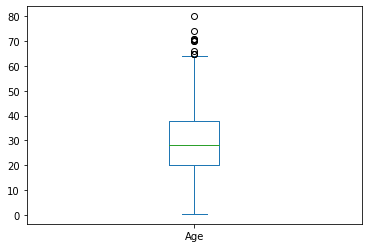

In [111]:
data.Age.plot.box()

<AxesSubplot:>

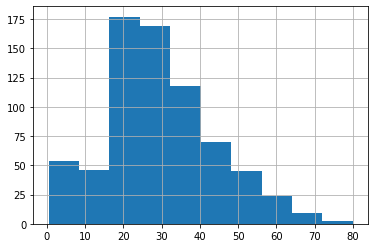

In [112]:
data.Age.hist() # гистограмма распределения возраста среди пассажиров

<AxesSubplot:>

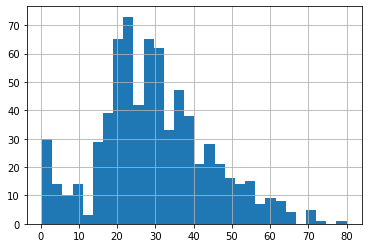

In [113]:
data.Age.hist(bins = 30) # увеличили кол-во столбцов (бинов)

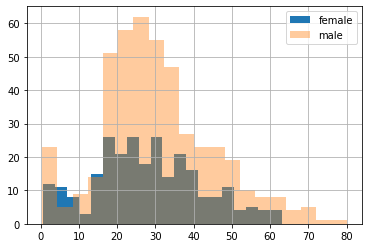

In [123]:
x = data[data.Sex == 'female'].Age.hist(bins = 20, label='female', histtype='bar')
y = data[data.Sex == 'male'].Age.hist(bins = 20, alpha = 0.4, label='male', histtype='bar')#гистограмма распределения возраста среди мужчин

Задание: постройте гистограмму для распределения стоимости билетов (Fare).

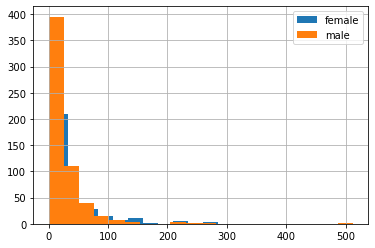

In [128]:
x=data[data.Sex == 'female'].Fare.hist(bins = 20, label='female', histtype='bar')
x.legend()
y=data[data.Sex == 'male'].Fare.hist(bins = 20, label='male', histtype='bar')
y.legend()

Задание: сранивте гистограммы распределения стоимости билетов для разных классов (Pclass).

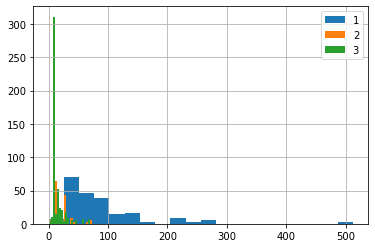

In [131]:
first_class=data[data.Pclass == 1].Fare.hist(bins = 20, label='1', histtype='bar')
first_class.legend()
second_class=data[data.Pclass == 2].Fare.hist(bins = 20, label='2', histtype='bar')
second_class.legend()
third_class=data[data.Pclass == 3].Fare.hist(bins = 20, label='3', histtype='bar')
third_class.legend()

Построим столбчатую диаграмму для признака "класс пассажира":

1) Сгруппируем все данные по признаку Pclass - data.groupby('Pclass') и посчитаем количество в каждой из групп - size()

In [132]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

2) На полученных данных построим диаграмму:

<AxesSubplot:xlabel='Pclass'>

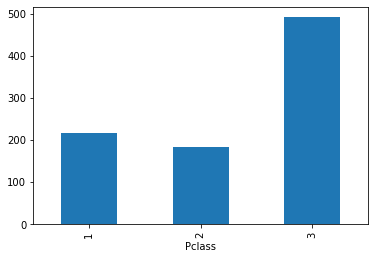

In [133]:
data.groupby('Pclass').size().plot(kind = 'bar')

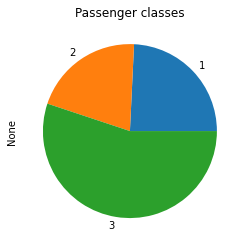

In [134]:
x = data.groupby('Pclass').size().plot(kind = 'pie', title = 'Passenger classes')

<AxesSubplot:xlabel='Embarked'>

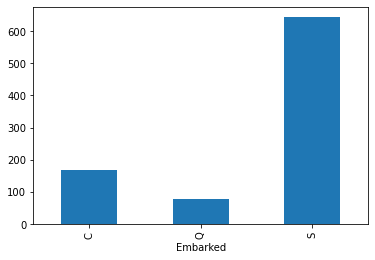

In [135]:
data.groupby('Embarked').size().plot(kind = 'bar')

Задание: постройте по гистограмме и круговой диаграмме для еще двух категориальных признаков.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Можно делать и чуть более сложные графики. Давйте посмотрим на распределение выживших среди мужчин и женщин.

<AxesSubplot:xlabel='Survived,Sex'>

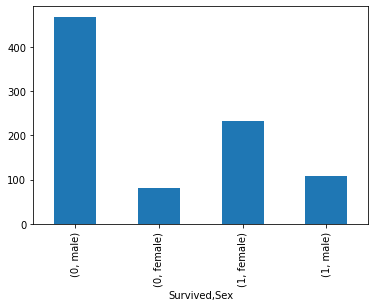

In [136]:
data.groupby(['Survived'])['Sex'].value_counts().plot(kind = 'bar')

Так мы видим разбивку, но хотелось бы получить составные столбики. Для этого выполним метод unstack(), который преобразует датафрейм.

In [137]:
data.groupby(['Survived'])['Sex'].value_counts() # без unstack

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [138]:
data.groupby(['Survived'])['Sex'].value_counts().unstack() # с unstack. Обратите внимание, как изменилась структура датафрема.

Sex,female,male
Survived,,
0,81,468
1,233,109


А вот его мы уже можем визуализировать. 

<AxesSubplot:xlabel='Survived'>

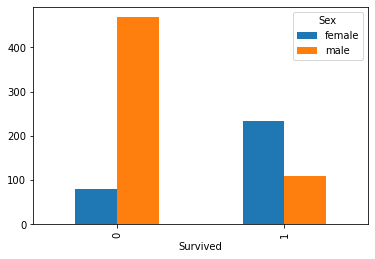

In [139]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind = 'bar')

Уже лучше. А еще можно добавить дополнительный параметр в метод plot() и станет совсем хорошо.

<AxesSubplot:xlabel='Survived'>

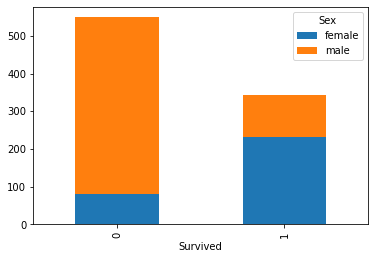

In [140]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar', stacked = True)

Сохранение датафрейма:

In [ ]:
data.to_csv('new_titanic.csv')

## Описательные статистики в Python


**Описательная статистика на Python: количественные и качественные данные**

Описательная статистика или дескриптивная статистика (*англ.* descriptive statistics) занимается обработкой эмпирических данных, их систематизацией, наглядным представлением в форме графиков и таблиц, а также их количественным описанием посредством  статистических показателей.

Для начала разберемся с несколькими важными определениями:

**Распределение**

Случайная величина — это переменная, значения которой представляют собой исходы какого-нибудь случайного феномена или эксперимента. Простыми словами: это численное выражение результата случайного события. Случайная величина является одним из основных понятий теории вероятностей.

Распределение вероятностей — это закон, описывающий область значений случайной величины и вероятности их исхода (появления).

Чтобы чуть лучше понять, что же такое распределение, давайте посмотрим на гистограмму признака "Age".

**Гистограмма**

Гистограмма представляет собой столбчатую диаграмму.

При построении гистограммы множество значений признака разбивается на $k$ интервалов,
эти интервалы становятся основаниями столбцов. Высоты стобцов пропорциональны количеству (частоте) значений признака, попадающих в 
соответствующий интервал.

<AxesSubplot:>

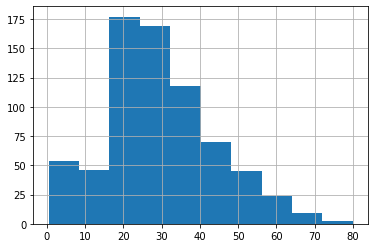

In [141]:
data.Age.hist()

Обычно, когда говорят о распределении, представляют сглаженную линию, под которой могли бы находиться все наши данные. Такой график уже показывает нам не сколько раз встречается каждое значение, а какую долю распределения такие значения составляют.
Давайте импортируем библиотеку для визуализаций seaborn (о ней поговорим подробнее в следующий раз), которая поможет нам построить такой график.

/Users/ki.vasilyev/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

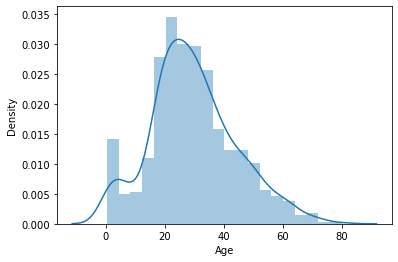

In [142]:
import seaborn as sns  # импортируем библиотеку под именем sns

sns.distplot(data.Age.dropna())  # применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным. 
                                 # методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

В идеальном мире многие вещи распределены нормально (например, вес и рост людей). Это значит, что такое распределение имеет определенные параметры (не будем их обсуждать в этом курсе) и выглядит как колокол (а вот это можно и запомнить). 

Для некоторых моделей в статистике мы можем применять только переменные, которые распределены нормально. Давайте посмотрим, как распределен возраст пассажиров относительно нормального распределения. Для этого импортируем функцию, которая задает нормальное распределение.

/Users/ki.vasilyev/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

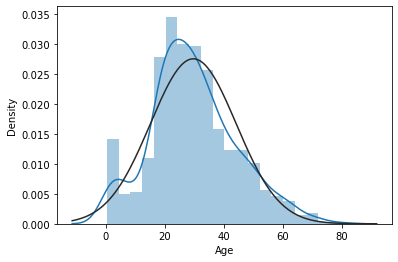

In [143]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.Age.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего, 
                                           # сейчас мы просим его построить нормальное распределение 

Как распределние возраста выглядит относительно нормального?

**Задание:** постройте распределение цены билетов, как он выглядит относительно нормального распределения?


**Максимальное и минимальное значения**

In [ ]:
data.Age.min()

In [ ]:
data.Age.max()

In [ ]:
min_fare = #?
max_fare = #?

print("Минимальная стоимость билета на Титанике составляла %s, а максимальная - %s" % (min_fare, max_fare))

**Меры центральной тенденции**

Меры среднего уровня дают усредненную характеристику совокупности объектов по определенному признаку.

В зависимости от типа шкалы измерения применяются следующие меры среднего уровня:
- для количественных данных - среднее значение (арифметическое среднее), медиана, мода

- для категориальных:

   для порядковых данных - медиана, мода

   для номинальных данных - мода

На самом деле таких мер довольно много, например: взвешенное среднее — среднее значение, учитывающее весовые коэффициенты для каждого значения, гармоническое среднее — количество наблюдений, деленное на сумму инвертированных значений наблюдений, и так далее.

**Среднее значение (математическое ожидание)**

*Математическое ожидание* вычисляется по формуле:

$$
 {\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {1}{n}}(x_{1}+\ldots +x_{n})} 
 $$

In [ ]:
data.Age.mean()

In [ ]:
mean_fare = #?
print("Средняя стоимость билета на Титанике составляла %s" % (mean_fare))

**Немного усложним задачу**

In [ ]:
data[['Pclass', 'Age']].groupby('Pclass').mean()

**Медиана**

Если $x_1, x_2, ..., x_n$ – упорядоченные по возрастанию или убыванию числовые значения рассматриваемого признака, 
$n$ – объем выборки, то *медиана* - это средний элемент для нечетного  $n$ и полуcумма средних элементов для четного  $n$.

Для порядковой шкалы медиана является такой точкой на шкале, которая делит всю совокупность опрошенных на две равных части — тех, кто отметил градации меньше этой точки (либо равные ей), и тех, кто отметил градации больше этой точки.

Вопрос знатокам: можно ли посчитать медиану для категориальных не порядковых данных? 🤔

In [144]:
data.Age.median()

28.0

In [ ]:
median_fare = #?
print("Медиана стоимости билета на Титанике составляла %s" % (median_fare))

**Мода**

Мода - значение во множестве наблюдений, которое встречается наиболее часто.

In [145]:
data.Pclass.mode()

0    3
Name: Pclass, dtype: int64

In [ ]:
data.Pclass.value_counts()

**Меры разброса**

Меры разброса показывают, насколько хорошо данные значения представляют совокупность. Как меры разброса применяются:

- дисперсия случайной величины и среднеквадратическое отклонение

- коэффициент вариации (это отношение среднеквадратического отклонения к среднему значению, выраженное в процентах, показывает однородность выборки)

- и так далее

**Дисперсия и среднеквадратическое отклонение**

*Дисперсия* значений признака является суммой квадратов отклонений этих значений от их среднего, деленной на число наблюдений:
$$
\sigma^2={\dfrac {\sum \limits _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)}{n}}^{2}
$$
*Среднеквадратическое отклонение*, *стандартное отклонение* или *стандартный разброс* - квадратный корень из дисперсии, равный $\sigma$

Стандартное отклонение измеряется в тех же единицах, что и сама случайная величина, а дисперсия измеряется в квадратах этой единицы измерения.

In [ ]:
data[['Pclass', 'Age']].groupby('Pclass').std()

In [ ]:
data[data.Pclass == 1].Age.hist()

In [ ]:
data[data.Pclass == 3].Age.hist()

**Квантили**

Квантиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем.

Например, фраза «для развитых стран 99-процентиль продолжительности жизни составляет 100 лет» означает, что ожидается, что 99 % людей проживут не более, чем 100 лет.

Относительно нашего датасета фраза "75%-перцентиль возраста пассажиров Титаника равна 38 лет" означает, что 75% пассажиров были не старше 38 лет.

Вопросы знатокам:
- Как еще можно назвать 50%-перцентиль? 🤔
- Что значит фраза "75%-перцентиль стоимости билетов на Титаник была равна 31"? 🤔

In [ ]:
data.Age.describe()

In [ ]:
data.Age.hist(bins=25)

**Описание массива нечисловых данных**

В качестве базовой описательной статистики для категориальных признаков можно использовать следующий набор характеристик:

- количество уникальных представителей массива

- частоты встречаемости этих представителей

- наиболее часто встречающиеся представители (мода распределения)

- наиболее редко встречающиеся представители

In [ ]:
data.Pclass.unique()

In [ ]:
data.Pclass.value_counts()

In [ ]:
data.Pclass.mode()

## И еще чуть-чуть! Работа с пропущенными значениями.

Если вы помните, то переменная Age содержит пропущенные значения. Давайте посмотрим информацию об этой колонке.


In [ ]:
data[['Age']].info()  # обратите внимание - двойные скобки. Так pandas нам вернет датафрейм из одной колонки, а не список.
                      # А метод info() работает только с датафреймом


In [ ]:
type(data['Age'])  # вот так - объект подобный списку (Series)

In [ ]:
type(data[['Age']])  # а вот так - датафрейм

Вернемся к info(). Мы видим, что из 891 наблюдения у нас только 714 ненулевых значений. Значит, у этих пассажиров возраст неизвестен. Ваши идеи, что можно с этим сделать?

Есть разные варианты того, что делать с пропущенными значениями - от "не делать ничего и выкинуть их" до "давайте предскажем их значения с помощью нейронки". Почитать можно здесь: 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Мы с вами попробуем сделать второй по сложности вариант (после не делать ничего) и заменить их средним значением (средним или медианой). Для категориальных данных можно заполнять пропущенные значения модой.

Пропущенные значения могут быть закодированы по-разному - 0, 'No response', '999'. В итоге мы их всегда хотим привести к объекту NaN (not a number), с которым могут работать методы pandas. В нашем датасете они уже нужного формата. В других случаях, нужно будет отфильь значения и привести их нужному виду.


In [ ]:
print(data.loc[5, 'Age'])
print(type(data.loc[5, 'Age']))

In [ ]:
data[data['Age'].isnull()].head() # выводим значения датафрейма, в которых отсутствует возраст
                                  # Они возращают True методу .isnull()

In [ ]:
data['Age'].median() # вспомним какая у нас медиана

In [ ]:
data['Age_Median'] = data['Age'].fillna(data['Age'].median())  # сохраняю результат заполнения в новую колонку

In [ ]:
data[data['Age'].isnull()].head()  # смотрим, что произошло с возрастом в новой колонке у тех, у кого он отсутсвовал

In [ ]:
data.head() # А у всех остальных - их нормальный возраст.

Такой метод один из самых топорных, но сойдет для первого знакомства или черновика анализа в серьезном исследовании. Давайте попробуем теперь немного улучшить его. Посмотрим, как отличается медианный возраст для мужчин и женщин.

In [ ]:
data.groupby('Sex')['Age'].median()

Разница два года! Было бы логично в наших данных заполнять недостающие значения по полу.

In [ ]:
data["Age_Median_Sex"] = data["Age"].fillna(data.groupby('Sex')["Age"].transform('median'))

In [ ]:
data[data['Age'].isnull()].head() 

In [ ]:
data.head() # Опять проверяем, что это все применилось только к нужным людям

Разберем как работает предыдущий кусок кода

In [ ]:
# эта функция возвращает нам колонку возраст, где все значения заменены медианой по условию пола
# data.groupby('Sex') - группирует наши значения по полу
# ['Age'] - колонка, с которой работаем
# transform('median') - высчитывает медианный возраст для каждого пола и подставляет ее вместо значения
data.groupby('Sex')['Age'].transform('median').head()

In [ ]:
# когда передаем это все как аргумент методу .fillna - заполнение по медиане работает только для отсутвтующих значений.
data["Age"].fillna(data.groupby('Sex')["Age"].transform('median')).head(10)

**Задание**
Заполните осутствующие значения переменной возраст на основании титула.

**Заполнение по моде для категориальных переменных**

Тоже самое (почти!) работает и для категориальных переменных.

In [ ]:
data[data["Embarked"].isnull()]

Давайте посмотрим, что возвращает нам функция мода - не число, как например median или mean, а список. 

In [ ]:
data['Embarked'].mode()

Чтобы передать ее результат методу fillna, нам нужно "вытащить" значение из него (а это мы умеем делать - оно лежит под нулевым индексом.


In [ ]:
data['Embarked'].mode()[0]

In [ ]:
# применяем
data["Embarked_Mode"] = data["Embarked"].fillna(data['Embarked'].mode()[0])

In [ ]:
# проверяем
data.loc[61]